# Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Loading the file

In [10]:
mf1 = pd.read_csv('/Users/singhanyadav/Desktop/DATATHON/transactions_datathon_ready.csv')

In [11]:
mf1

,amount,zip,mcc,date,use_chip,merchant_city,merchant_state,user_id,transaction_id
0,201.787069,48036.0,4899.0,2010-01-01 13:47:00,Online Transaction,ONLINE,CA,0,1
1,42.283621,23707.0,5719.0,2010-01-01 11:29:00,Swipe Transaction,Portsmouth,VA,0,2
2,7.060345,62865.0,5411.0,2010-01-01 06:16:00,Swipe Transaction,Mulkeytown,IL,0,3
3,4.767241,46124.0,5411.0,2010-01-01 11:44:00,Swipe Transaction,Edinburgh,IN,0,4
4,58.208621,70605.0,5411.0,2010-01-01 09:55:00,Swipe Transaction,Lake Charles,LA,0,5
...,...,...,...,...,...,...,...,...,...
2317350,699.943966,60005.0,7802.0,2010-01-01 01:48:00,Swipe Transaction,Arlington Heights,IL,58644,2317351
2317351,77.702586,27278.0,5651.0,2010-01-01 04:38:00,Swipe Transaction,Hillsborough,NC,58644,2317352
2317352,21.556034,95035.0,5310.0,2010-01-01 05:51:00,Swipe Transaction,Milpitas,CA,58644,2317353
2317353,6.297414,57110.0,5814.0,2010-01-01 06:15:00,Swipe Transaction,Sioux Falls,SD,58644,2317354


In [12]:
mf2 = pd.read_csv('/Users/singhanyadav/Desktop/DATATHON/train.csv')

In [13]:
mf2

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2,EDUCATION,A,5000,8.90,0.17,N,3,0


In [21]:
mf1_agg = (
    mf1
    .groupby("user_id")
    .agg(
        txn_count=("transaction_id", "count"),
        total_amount=("amount", "sum"),
        avg_amount=("amount", "mean"),
        max_amount=("amount", "max"),
        std_amount=("amount", "std"),
        online_txn_count=("use_chip", lambda x: (x == "Online Transaction").sum()),
        swipe_txn_count=("use_chip", lambda x: (x == "Swipe Transaction").sum()),
    )
    .reset_index()
)
mf1_agg

,user_id,txn_count,total_amount,avg_amount,max_amount,std_amount,online_txn_count,swipe_txn_count
0,0,45,878.970690,19.532682,201.787069,72.296769,4,41
1,1,47,613.064828,13.043933,272.729655,110.657650,0,47
2,2,35,800.019310,22.857695,166.041931,59.787840,3,32
3,3,33,1547.168966,46.883908,340.912069,96.530581,1,32
4,4,34,469.200000,13.800000,345.920690,104.934984,3,31
...,...,...,...,...,...,...,...,...
58640,58640,41,2773.055172,67.635492,819.372414,138.721620,2,39
58641,58641,30,-397.514483,-13.250483,39.431172,58.782259,5,25
58642,58642,42,-155.206207,-3.695386,60.242069,68.912987,5,37
58643,58643,47,-260.958621,-5.552311,41.074138,50.582672,10,37


In [23]:
mf2_fixed = mf2.rename(columns={"id": "user_id"})
mf2_fixed

,user_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2,EDUCATION,A,5000,8.90,0.17,N,3,0


In [25]:
mf3 = mf1_agg.merge(
    mf2_fixed,
    on="user_id",
    how="left"
)
mf3

,user_id,txn_count,total_amount,avg_amount,max_amount,std_amount,online_txn_count,swipe_txn_count,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,45,878.970690,19.532682,201.787069,72.296769,4,41,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,47,613.064828,13.043933,272.729655,110.657650,0,47,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,35,800.019310,22.857695,166.041931,59.787840,3,32,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,33,1547.168966,46.883908,340.912069,96.530581,1,32,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,34,469.200000,13.800000,345.920690,104.934984,3,31,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,41,2773.055172,67.635492,819.372414,138.721620,2,39,34,120000,MORTGAGE,5,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,30,-397.514483,-13.250483,39.431172,58.782259,5,25,28,28800,RENT,0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,42,-155.206207,-3.695386,60.242069,68.912987,5,37,23,44000,RENT,7,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,47,-260.958621,-5.552311,41.074138,50.582672,10,37,22,30000,RENT,2,EDUCATION,A,5000,8.90,0.17,N,3,0


# Merging files

In [26]:
mf3

,user_id,txn_count,total_amount,avg_amount,max_amount,std_amount,online_txn_count,swipe_txn_count,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,45,878.970690,19.532682,201.787069,72.296769,4,41,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,47,613.064828,13.043933,272.729655,110.657650,0,47,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,35,800.019310,22.857695,166.041931,59.787840,3,32,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,33,1547.168966,46.883908,340.912069,96.530581,1,32,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,34,469.200000,13.800000,345.920690,104.934984,3,31,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,41,2773.055172,67.635492,819.372414,138.721620,2,39,34,120000,MORTGAGE,5,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,30,-397.514483,-13.250483,39.431172,58.782259,5,25,28,28800,RENT,0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,42,-155.206207,-3.695386,60.242069,68.912987,5,37,23,44000,RENT,7,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,47,-260.958621,-5.552311,41.074138,50.582672,10,37,22,30000,RENT,2,EDUCATION,A,5000,8.90,0.17,N,3,0


# Data Quality Check

In [34]:
dq = pd.DataFrame({
    "dtype": mf3.dtypes,
    "missing_count": mf3.isna().sum(),
    "missing_pct": (mf3.isna().mean() * 100).round(2),
    "unique_values": mf3.nunique()
})

numeric_summary = mf3.describe().T

duplicate_users = mf3["user_id"].duplicated().sum()

constant_cols = [c for c in mf3.columns if mf3[c].nunique() <= 1]

dq, numeric_summary, duplicate_users, constant_cols

(                              dtype  missing_count  missing_pct  unique_values
 user_id                       int64              0          0.0          58645
 txn_count                     int64              0          0.0             20
 total_amount                float64              0          0.0          58437
 avg_amount                  float64              0          0.0          58601
 max_amount                  float64              0          0.0           7209
 std_amount                  float64              0          0.0          58645
 online_txn_count              int64              0          0.0             22
 swipe_txn_count               int64              0          0.0             35
 person_age                    int64              0          0.0             53
 person_income                 int64              0          0.0           2641
 person_home_ownership        object              0          0.0              4
 person_emp_length             int64    

# Choosing the loan_status as target variable

# EXPLORATORY DATA ANALYSIS

# Target Variable Overview

# Target Variable Overview

In [35]:
mf3["loan_status"].value_counts(normalize=True)

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64

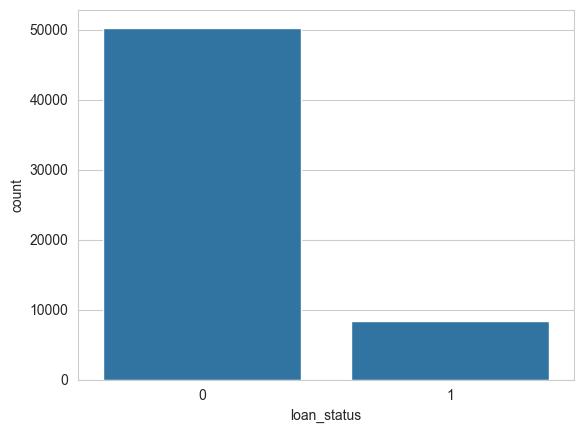

In [36]:
sns.countplot(x="loan_status", data=mf3)
plt.show()


# Univariate Analysis – Numerical Features

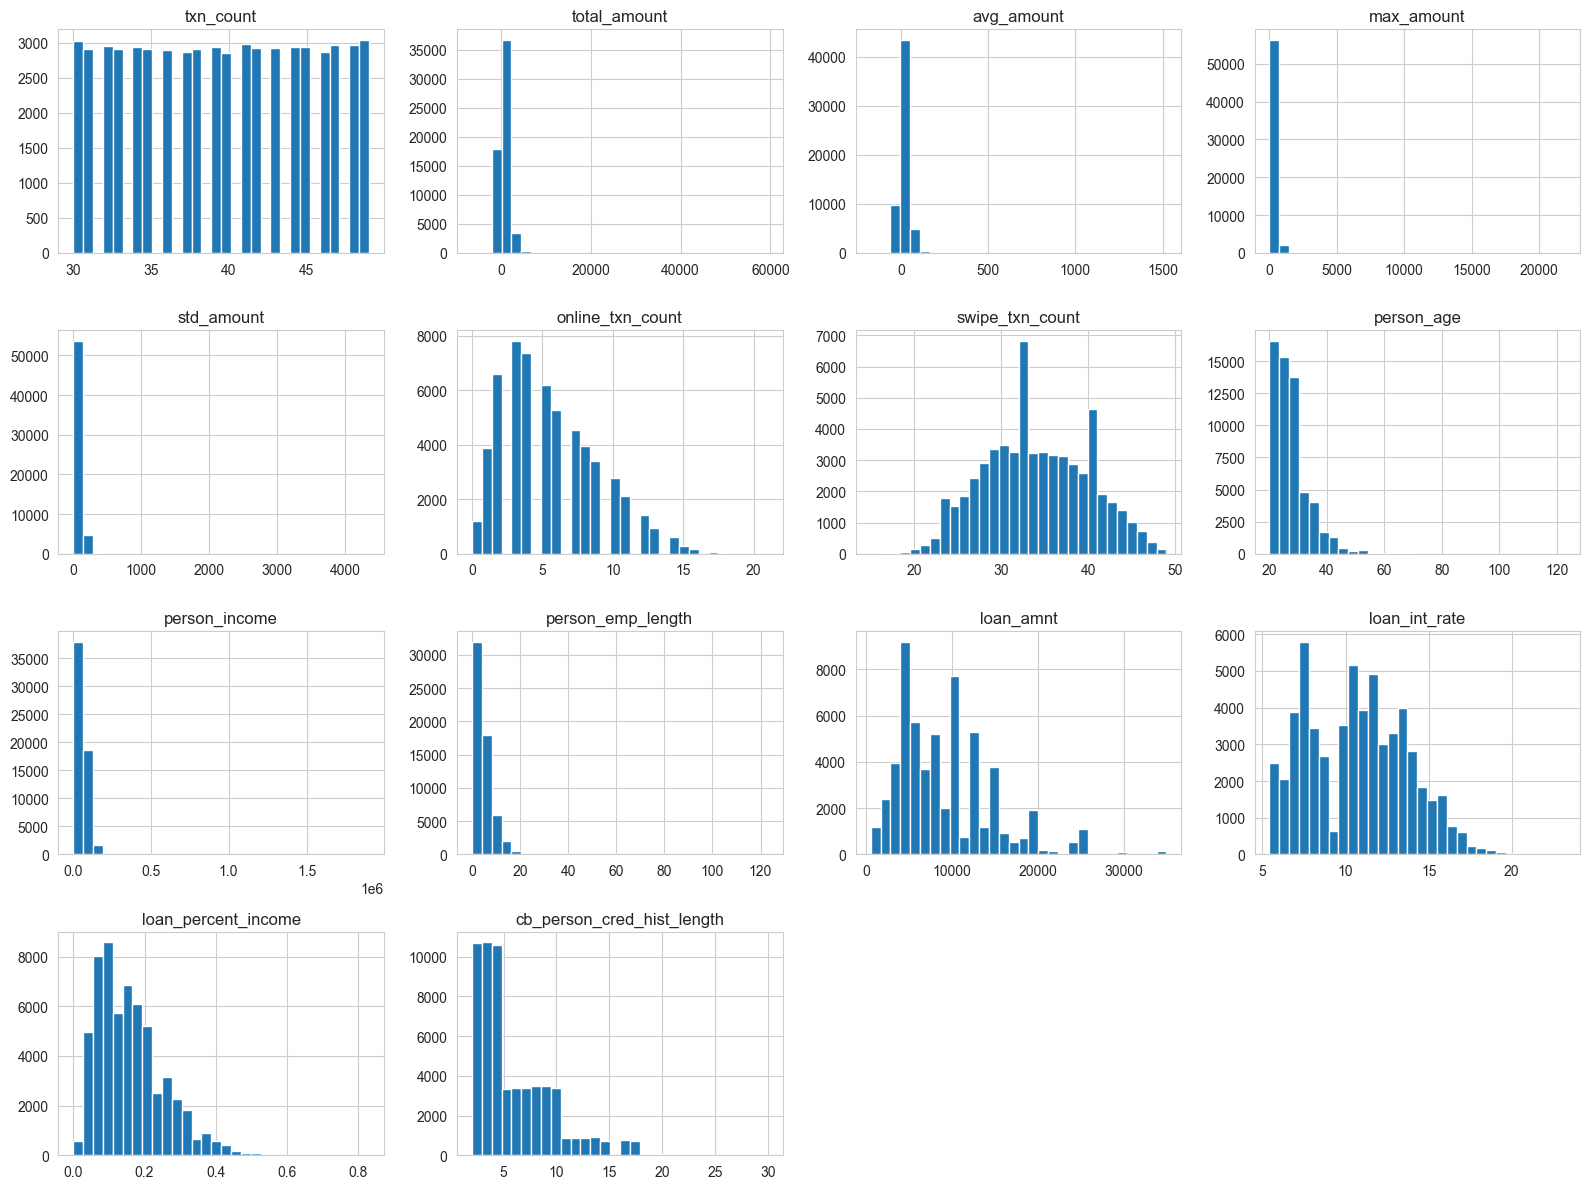

In [38]:
num_cols = mf3.select_dtypes(include=np.number).columns.drop(["user_id", "loan_status"])
mf3[num_cols].describe().T
mf3[num_cols].hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()

# Target vs Numerical Features

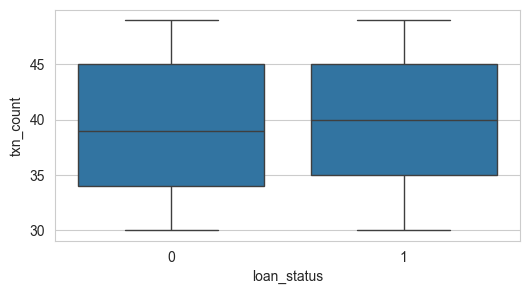

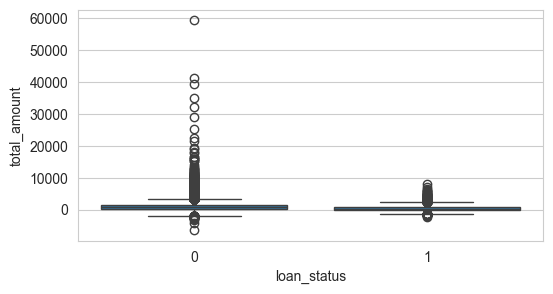

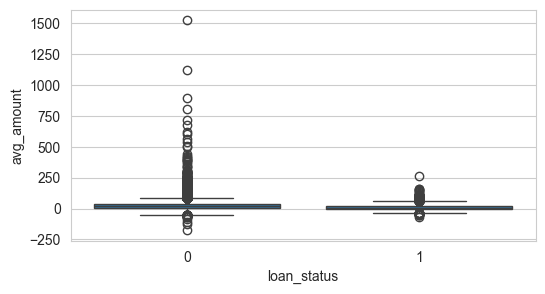

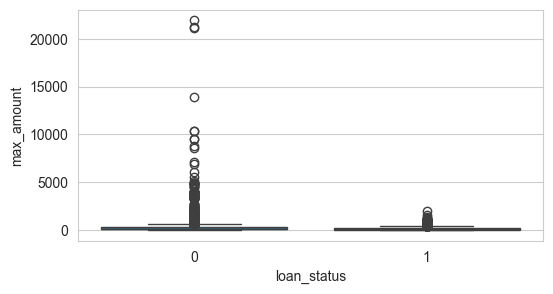

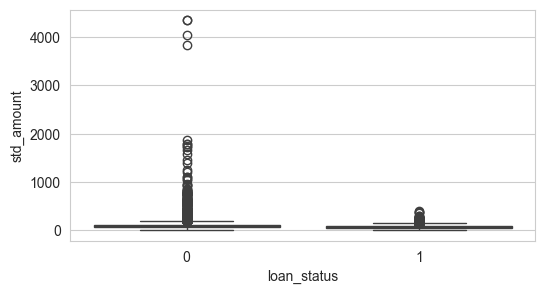

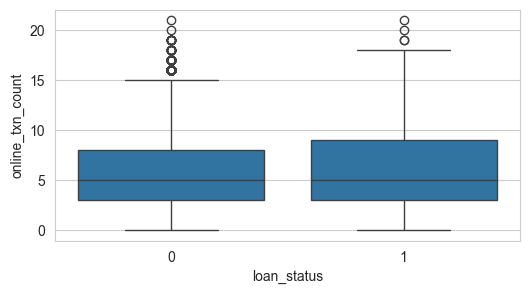

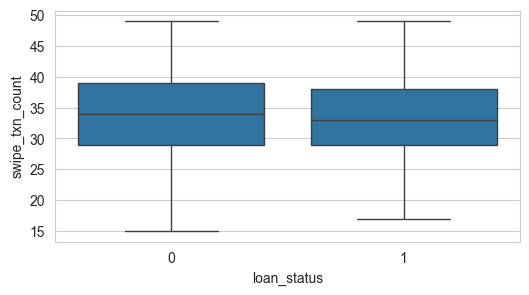

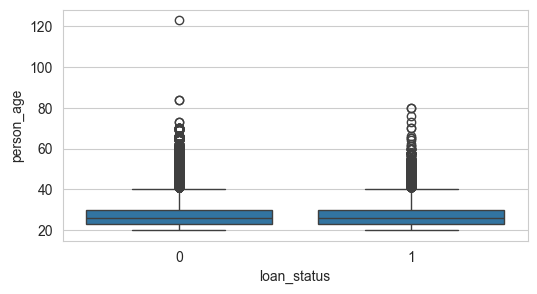

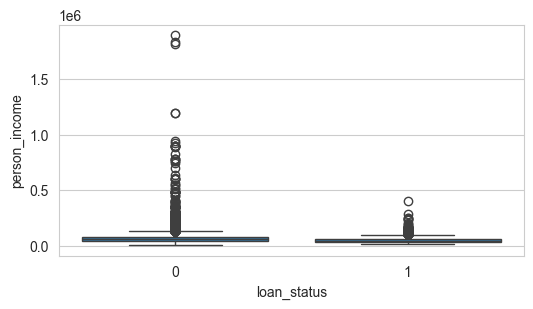

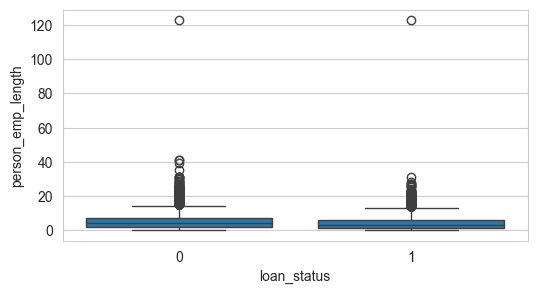

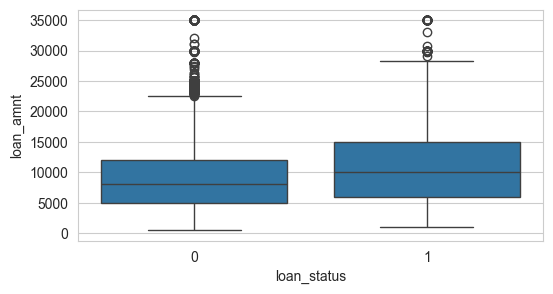

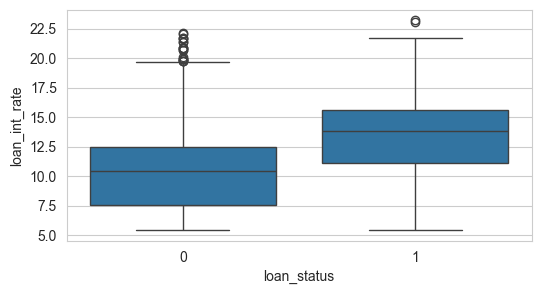

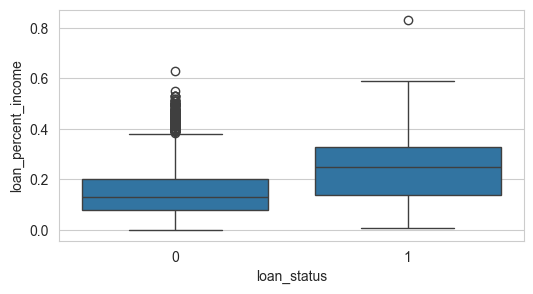

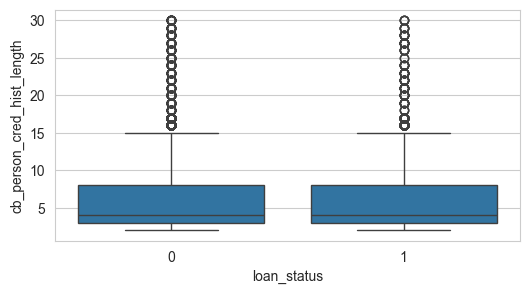

In [39]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x="loan_status", y=col, data=mf3)
    plt.show()


# Categorical Feature Analysis

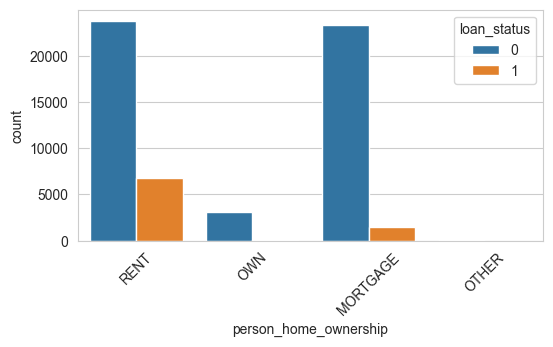

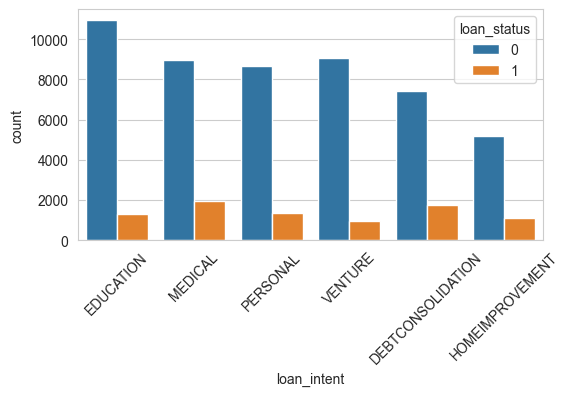

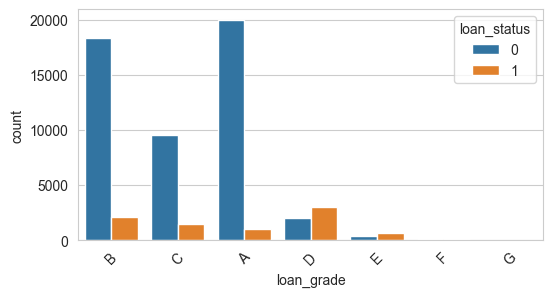

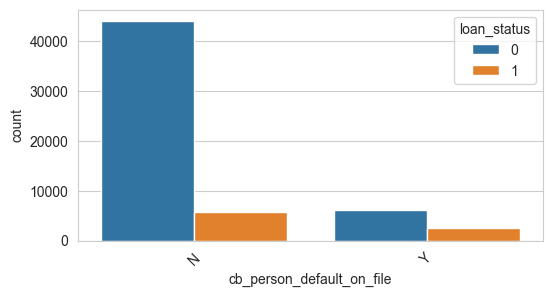

In [40]:
cat_cols = mf3.select_dtypes(include="object").columns
cat_cols
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue="loan_status", data=mf3)
    plt.xticks(rotation=45)
    plt.show()


# Aggregated Default Rates

In [41]:
def default_rate(col):
    return mf3.groupby(col)["loan_status"].mean().sort_values(ascending=False)

default_rate("loan_grade")


loan_grade
G    0.818182
E    0.625372
F    0.610738
D    0.593564
C    0.135375
B    0.102304
A    0.049180
Name: loan_status, dtype: float64

In [42]:
default_rate("loan_intent")


loan_intent
DEBTCONSOLIDATION    0.189313
MEDICAL              0.178251
HOMEIMPROVEMENT      0.173726
PERSONAL             0.132788
EDUCATION            0.107734
VENTURE              0.092798
Name: loan_status, dtype: float64

In [43]:
default_rate("person_home_ownership")


person_home_ownership
RENT        0.222560
OTHER       0.168539
MORTGAGE    0.059741
OWN         0.013703
Name: loan_status, dtype: float64

# Correlation Analysis

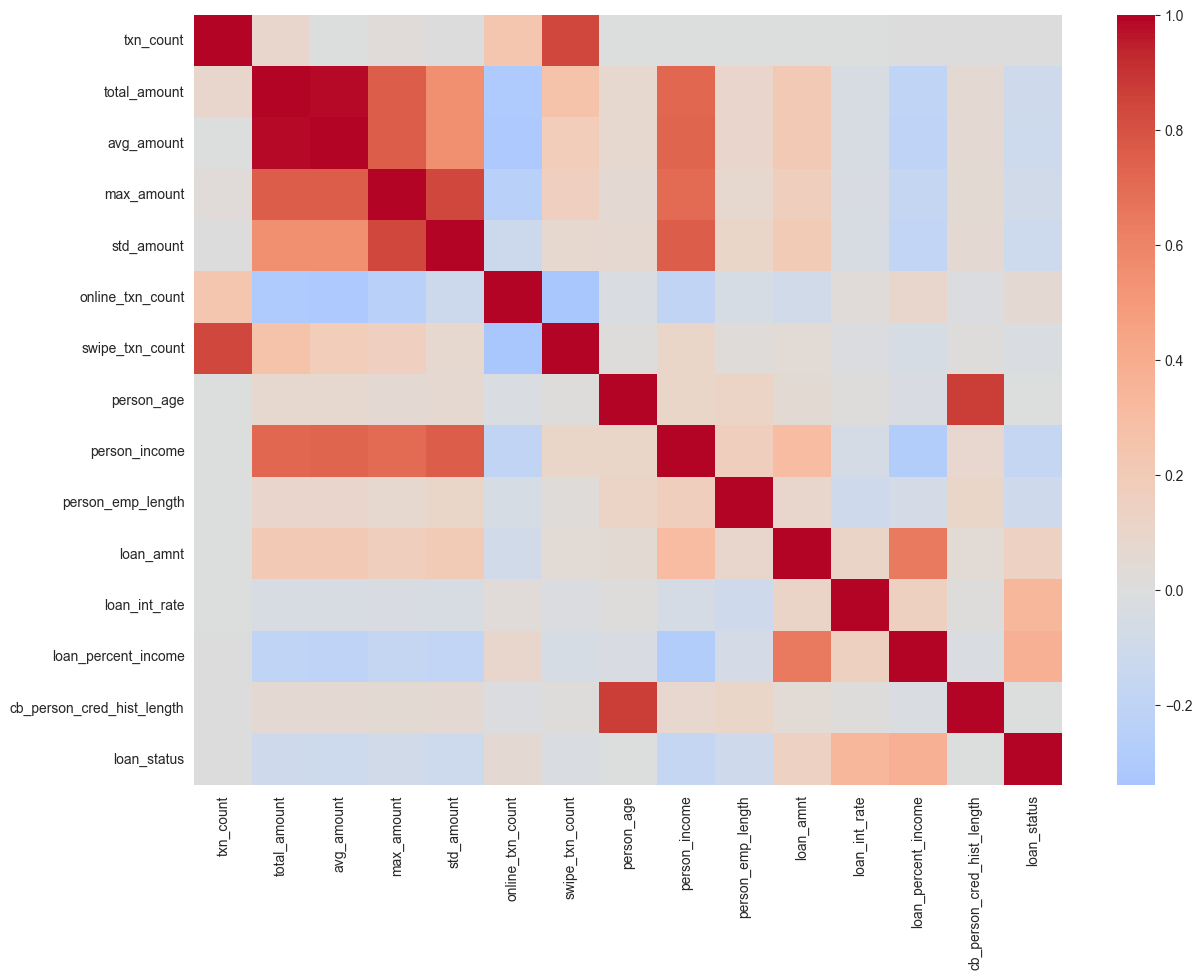

In [44]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    mf3[num_cols.tolist() + ["loan_status"]].corr(),
    cmap="coolwarm",
    center=0
)
plt.show()


# Default Rate by Transaction Intensity

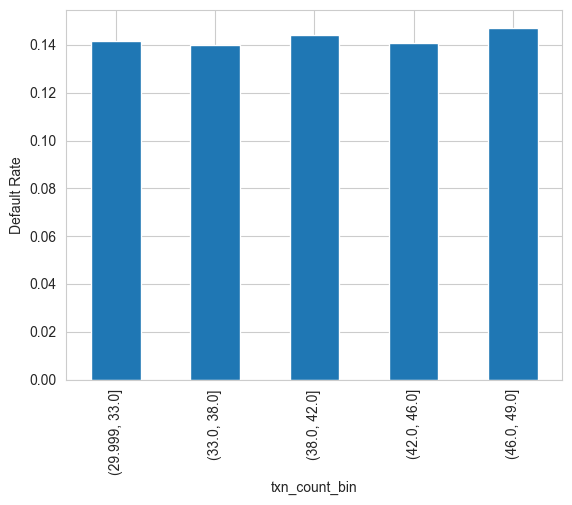

In [45]:
mf3["txn_count_bin"] = pd.qcut(mf3["txn_count"], q=5, duplicates="drop")

mf3.groupby("txn_count_bin")["loan_status"].mean().plot(kind="bar")
plt.ylabel("Default Rate")
plt.show()


# Spending Volatility vs Default

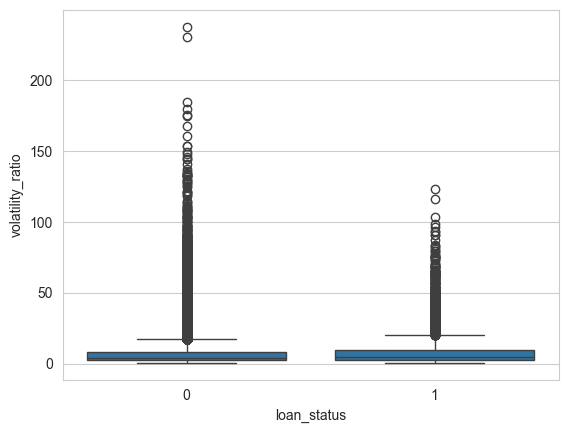

In [46]:
mf3["volatility_ratio"] = mf3["std_amount"] / (mf3["avg_amount"].abs() + 1)

sns.boxplot(x="loan_status", y="volatility_ratio", data=mf3)
plt.show()


# Loan Burden Stress Test

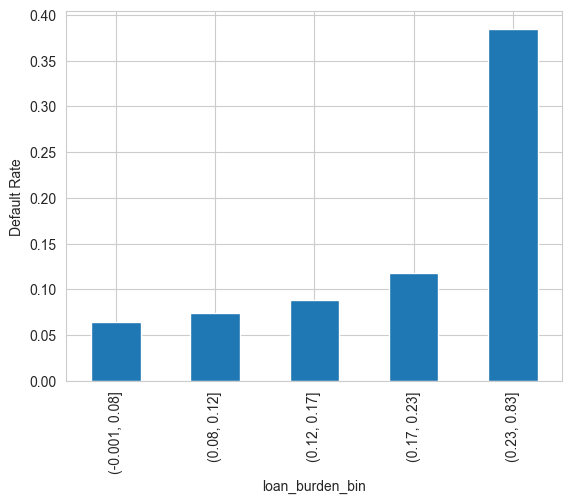

In [47]:
mf3["loan_burden_bin"] = pd.qcut(mf3["loan_percent_income"], q=5, duplicates="drop")

mf3.groupby("loan_burden_bin")["loan_status"].mean().plot(kind="bar")
plt.ylabel("Default Rate")
plt.show()


# Credit History vs Default

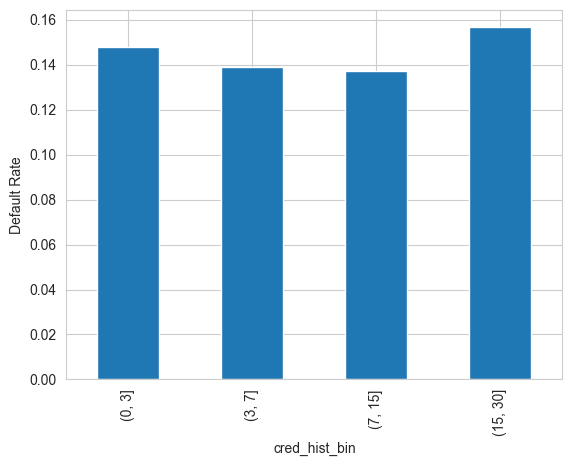

In [48]:
mf3["cred_hist_bin"] = pd.cut(
    mf3["cb_person_cred_hist_length"],
    bins=[0, 3, 7, 15, 30]
)

mf3.groupby("cred_hist_bin")["loan_status"].mean().plot(kind="bar")
plt.ylabel("Default Rate")
plt.show()


# Online Dependency Risk

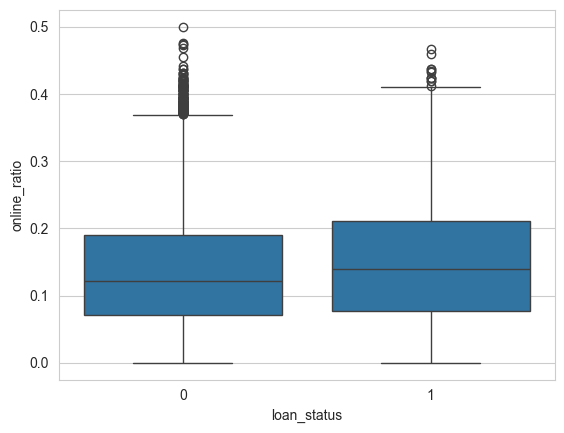

In [49]:
mf3["online_ratio"] = mf3["online_txn_count"] / (mf3["txn_count"] + 1)

sns.boxplot(x="loan_status", y="online_ratio", data=mf3)
plt.show()


# Income vs Loan Amount (Joint Risk View)

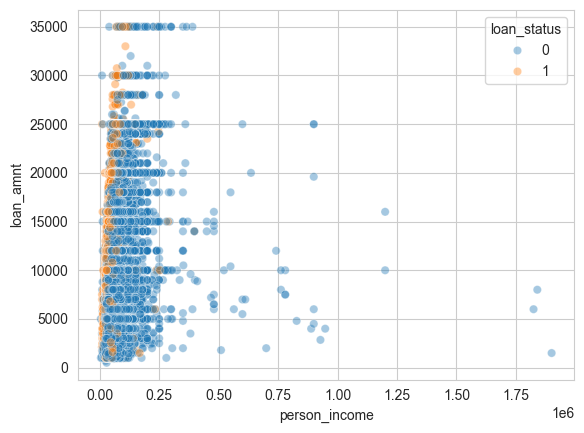

In [50]:
sns.scatterplot(
    x="person_income",
    y="loan_amnt",
    hue="loan_status",
    alpha=0.4,
    data=mf3
)
plt.show()


# Stability Indicators

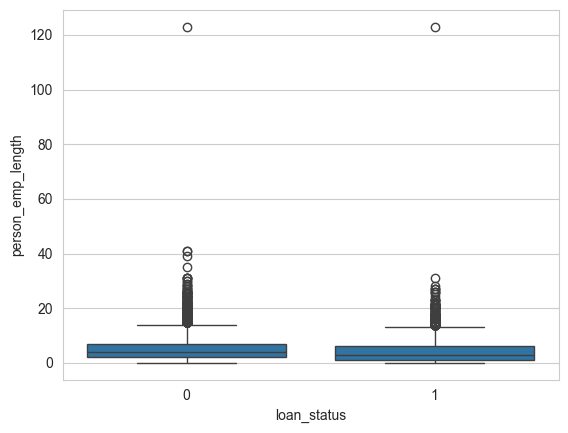

In [51]:
sns.boxplot(x="loan_status", y="person_emp_length", data=mf3)
plt.show()


# Feature Interaction Heatmap

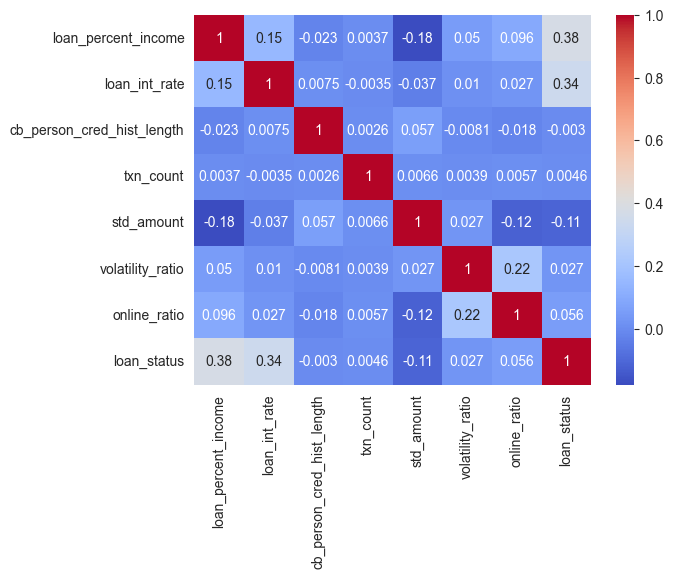

In [52]:
important = [
    "loan_percent_income",
    "loan_int_rate",
    "cb_person_cred_hist_length",
    "txn_count",
    "std_amount",
    "volatility_ratio",
    "online_ratio",
    "loan_status"
]

sns.heatmap(mf3[important].corr(), annot=True, cmap="coolwarm")
plt.show()


# Feature Engineering

In [54]:
df = mf3.copy()
target = "loan_status"
df = df.drop(columns=["user_id"])


# Identify Variable Types
## Categorical (direct WOE)
person_home_ownership
loan_intent
loan_grade
cb_person_default_on_file

# Numerical (bin → WOE)
txn_count
total_amount
avg_amount
max_amount
std_amount
online_txn_count
swipe_txn_count
person_age
person_income
person_emp_length
loan_amnt
loan_int_rate
loan_percent_income
cb_person_cred_hist_length


# Fine Classing

In [56]:
def fine_classing(series, bins=5):
    return pd.qcut(series, q=bins, duplicates="drop")
num_vars = [
    "txn_count",
    "total_amount",
    "avg_amount",
    "max_amount",
    "std_amount",
    "online_txn_count",
    "swipe_txn_count",
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length"
]

for col in num_vars:
    df[col + "_bin"] = fine_classing(df[col], bins=5)


# WOE & IV Function

In [57]:
def woe_iv(data, feature, target):
    eps = 1e-6
    grouped = data.groupby(feature)[target].agg(["count", "sum"])
    grouped.columns = ["total", "bad"]
    grouped["good"] = grouped["total"] - grouped["bad"]

    grouped["dist_good"] = grouped["good"] / grouped["good"].sum()
    grouped["dist_bad"] = grouped["bad"] / grouped["bad"].sum()

    grouped["woe"] = np.log((grouped["dist_good"] + eps) / (grouped["dist_bad"] + eps))
    grouped["iv"] = (grouped["dist_good"] - grouped["dist_bad"]) * grouped["woe"]

    return grouped.reset_index(), grouped["iv"].sum()


# IV Calculation - Categorical Variables

In [58]:
cat_vars = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file"
]

iv_results = {}

for col in cat_vars:
    _, iv = woe_iv(df, col, target)
    iv_results[col] = iv


# IV Calculation — Binned Numerical Variables

In [69]:
for col in num_vars:
    _, iv = woe_iv(df, col + "_bin", target)
    iv_results[col] = iv
iv_df = (
    pd.DataFrame.from_dict(iv_results, orient="index", columns=["IV"])
      .sort_values("IV", ascending=False)
)
iv_df


,IV
loan_grade,1.240897
loan_int_rate,0.927525
loan_percent_income,0.770767
person_home_ownership,0.601722
person_income,0.498306
cb_person_default_on_file,0.225759
std_amount,0.222802
max_amount,0.221379
avg_amount,0.174624
total_amount,0.173093


# Feature Selection Using IV

In [70]:
selected_features = iv_df[iv_df["IV"] >= 0.1].index.tolist()
selected_features

['loan_grade',
 'loan_int_rate',
 'loan_percent_income',
 'person_home_ownership',
 'person_income',
 'cb_person_default_on_file',
 'std_amount',
 'max_amount',
 'avg_amount',
 'total_amount',
 'loan_amnt',
 'person_emp_length']

# Coarse Classing

In [73]:
df["loan_percent_income_grp"] = pd.cut(
    df["loan_percent_income"],
    bins=[-np.inf, 0.2, 0.35, 0.6, np.inf],
    labels=["Low", "Medium", "High", "Very High"]
)


# WOE Transformation

In [65]:
woe_df = pd.DataFrame({target: df[target]})

for col in selected_features:
    if col in cat_vars:
        feature = col
    else:
        feature = col + "_bin"

    woe_table, _ = woe_iv(df, feature, target)
    woe_map = dict(zip(woe_table[feature], woe_table["woe"]))

    woe_df[col + "_WOE"] = df[feature].map(woe_map)
woe_df

,loan_status,loan_grade_WOE,loan_int_rate_WOE,loan_percent_income_WOE,person_home_ownership_WOE,person_income_WOE,cb_person_default_on_file_WOE,std_amount_WOE,max_amount_WOE,avg_amount_WOE,total_amount_WOE,loan_amnt_WOE,person_emp_length_WOE
0,0,0.376238,0.423332,0.535535,-0.544833,-0.964406,0.243919,0.156614,0.313416,-0.133197,0.267687,0.501213,-0.444266
1,0,0.058602,0.098906,0.874397,2.480521,0.075398,0.243919,0.231538,0.313416,-0.133197,-0.136375,0.325934,0.258306
2,0,1.166181,0.822745,0.215064,2.480521,-0.964406,0.243919,-0.172742,-0.147903,0.258344,-0.136375,0.501213,0.491062
3,0,0.376238,0.423332,0.535535,-0.544833,0.460513,0.243919,0.231538,0.781580,0.855713,0.843316,-0.090444,0.491062
4,0,1.166181,1.331688,0.726870,-0.544833,0.075398,0.243919,0.231538,0.781580,-0.133197,-0.136375,0.501213,-0.167316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,0,-2.174340,-1.420291,0.215064,0.960497,1.283067,-0.943082,0.828342,0.781580,0.855713,0.843316,-0.644565,0.202664
58641,1,0.058602,0.098906,-1.326009,-0.544833,-0.964406,0.243919,-0.172742,-0.647704,-0.213679,-0.209454,0.088367,-0.444266
58642,1,-2.174340,-1.420291,0.535535,-0.544833,0.055413,0.243919,0.156614,-0.647704,-0.213679,-0.209454,0.501213,0.258306
58643,0,1.166181,0.822745,0.535535,-0.544833,-0.964406,0.243919,-0.636426,-0.647704,-0.213679,-0.209454,0.325934,-0.167316


In [74]:
X = woe_df.drop(columns=["loan_status"])
y = woe_df["loan_status"]

X.isna().sum().sum(), y.value_counts(normalize=True)


(np.int64(0),
 loan_status
 0    0.857618
 1    0.142382
 Name: proportion, dtype: float64)

# Modelling

# Define X and y (WOE Dataset)

In [75]:
X = woe_df.drop(columns=["loan_status"])
y = woe_df["loan_status"]


# Train–Test Split (Stratified)


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)


# Train Logistic Regression (Scorecard Standard)

In [77]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="lbfgs"
)

model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [78]:
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]


# ROC–AUC Evaluation

In [79]:
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

train_auc, test_auc


(0.8921083130563279, 0.8945677205467122)

# KS Statistic

In [80]:
def ks_stat(y_true, y_prob):
    data = np.vstack([y_true, y_prob]).T
    data = data[data[:, 1].argsort()]
    cum_good = np.cumsum(1 - data[:, 0]) / (1 - data[:, 0]).sum()
    cum_bad = np.cumsum(data[:, 0]) / data[:, 0].sum()
    return np.max(np.abs(cum_bad - cum_good))

ks_train = ks_stat(y_train.values, y_train_pred)
ks_test = ks_stat(y_test.values, y_test_pred)

ks_train, ks_test

(np.float64(0.662759259238561), np.float64(0.6700955303257888))

# Coefficient Check

In [81]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
}).sort_values("coefficient", ascending=False)

coef_df


,feature,coefficient
8,avg_amount_WOE,0.044095
9,total_amount_WOE,0.013220
5,cb_person_default_on_file_WOE,0.011303
6,std_amount_WOE,-0.072962
1,loan_int_rate_WOE,-0.094511
7,max_amount_WOE,-0.120951
11,person_emp_length_WOE,-0.153140
3,person_home_ownership_WOE,-0.717016
2,loan_percent_income_WOE,-0.728080
10,loan_amnt_WOE,-0.757499


# SCORECARD CONSTRUCTION

In [82]:
BASE_SCORE = 600
PDO = 50          # Points to Double Odds
BASE_ODDS = 20    # Good : Bad

factor = PDO / np.log(2)
offset = BASE_SCORE - factor * np.log(BASE_ODDS)

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
})

intercept = model.intercept_[0]


# Create WOE Reference Tables

In [83]:
woe_maps = {}

for col in coef_df["feature"]:
    original = col.replace("_WOE", "")
    
    if original in df.columns:
        woe_table, _ = woe_iv(df, original, "loan_status")
    else:
        woe_table, _ = woe_iv(df, original + "_bin", "loan_status")
    
    woe_maps[col] = dict(zip(woe_table.iloc[:,0], woe_table["woe"]))


# Build Scorecard Table

In [85]:
scorecard = []

for _, row in coef_df.iterrows():
    feature = row["feature"]
    coef = row["coefficient"]
    
    for bin_val, woe in woe_maps[feature].items():
        points = -factor * coef * woe
        scorecard.append([feature, bin_val, woe, coef, points])

scorecard_df = pd.DataFrame(
    scorecard,
    columns=["feature", "bin", "woe", "coefficient", "points"]
)
intercept_points = offset - factor * intercept
intercept_points


np.float64(389.93310301428863)

# Final Credit Score Calculation

In [86]:
def calculate_score(row):
    score = intercept_points
    for col in coef_df["feature"]:
        score += -factor * model.coef_[0][list(X.columns).index(col)] * row[col]
    return score

woe_df["credit_score"] = woe_df.apply(calculate_score, axis=1)


# Inspect Score Distribution

In [87]:
woe_df["credit_score"].describe()


count    58645.000000
mean       456.920562
std        135.805973
min        -67.421934
25%        374.509701
50%        467.445365
75%        555.903678
max        775.706458
Name: credit_score, dtype: float64

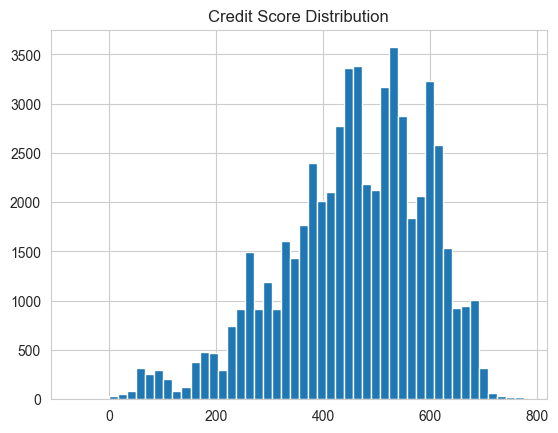

In [88]:
import matplotlib.pyplot as plt

plt.hist(woe_df["credit_score"], bins=50)
plt.title("Credit Score Distribution")
plt.show()


# Risk Bands (Segmentation)

In [89]:
woe_df["risk_band"] = pd.qcut(
    woe_df["credit_score"],
    q=5,
    labels=["Very High Risk", "High Risk", "Medium Risk", "Low Risk", "Very Low Risk"]
)

woe_df.groupby("risk_band")["loan_status"].mean()


risk_band
Very High Risk    0.539006
High Risk         0.096087
Medium Risk       0.041009
Low Risk          0.027280
Very Low Risk     0.008527
Name: loan_status, dtype: float64

# Cut-off Selection

In [92]:
cutoff_results = []

for c in [550, 580, 600]:
    decision = (woe_df["credit_score"] >= c).astype(int)
    
    approval_rate = decision.mean()
    default_rate_approved = woe_df.loc[decision == 1, "loan_status"].mean()
    rejected_default_rate = woe_df.loc[decision == 0, "loan_status"].mean()
    
    cutoff_results.append([
        c,
        approval_rate,
        default_rate_approved,
        rejected_default_rate
    ])

cutoff_df = pd.DataFrame(
    cutoff_results,
    columns=[
        "cutoff_score",
        "approval_rate",
        "default_rate_approved",
        "default_rate_rejected"
    ]
)

cutoff_df


,cutoff_score,approval_rate,default_rate_approved,default_rate_rejected
0,550,0.265905,0.010581,0.190123
1,580,0.204314,0.008596,0.176735
2,600,0.152971,0.007803,0.166687


# Final Model Performance

In [93]:
final_metrics = pd.DataFrame({
    "Metric": ["ROC-AUC", "KS Statistic", "Overall Default Rate"],
    "Value": [
        roc_auc_score(woe_df["loan_status"], -woe_df["credit_score"]),
        ks_stat(woe_df["loan_status"].values, -woe_df["credit_score"].values),
        woe_df["loan_status"].mean()
    ]
})

final_metrics


,Metric,Value
0,ROC-AUC,0.892855
1,KS Statistic,0.664414
2,Overall Default Rate,0.142382


# FINAL SCORECARD OUTPUT

In [94]:
woe_df[[
    "credit_score",
    "risk_band",
    "decision",
    "loan_status"
]].head(10)


,credit_score,risk_band,decision,loan_status
0,391.672114,High Risk,0,0
1,598.579240,Very Low Risk,0,0
2,597.543951,Very Low Risk,0,0
3,452.576929,Medium Risk,0,0
4,535.550160,Low Risk,0,0
5,472.931184,Medium Risk,0,0
6,466.705623,Medium Risk,0,0
7,348.995784,High Risk,0,0
8,288.475931,Very High Risk,0,0
9,507.463789,Medium Risk,0,0


# FINAL RISK POLICY

In [96]:
policy = pd.DataFrame({
    "Risk Band": [
        "Very Low Risk",
        "Low Risk",
        "Medium Risk",
        "High Risk",
        "Very High Risk"
    ],
    "Action": [
        "Auto Approve",
        "Approve",
        "Manual Review",
        "Reject",
        "Reject"
    ]
})

policy


,Risk Band,Action
0,Very Low Risk,Auto Approve
1,Low Risk,Approve
2,Medium Risk,Manual Review
3,High Risk,Reject
4,Very High Risk,Reject
